##utility NB for cumulative distribution plot UI class 4
##FBB August 2015

In [17]:
import os
import numpy as np
from scipy.special import erf
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%pylab inline
import pylabsetup
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Cumulative Distribution Function for Normal distribution 
#$\frac12\left[1 + \operatorname{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}}\right)\right] $
#$\operatorname{erf}(x) = \frac{2}{\sqrt\pi}\int_0^x e^{-t^2}\,\mathrm dt$

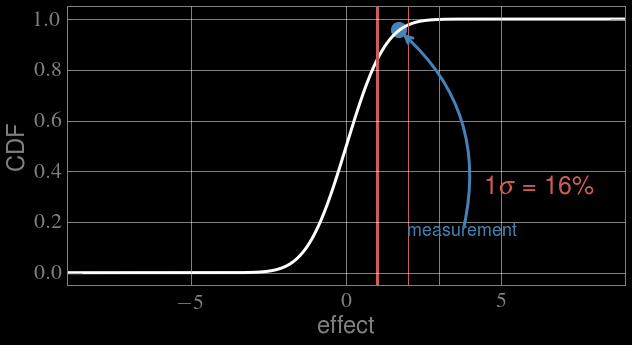

In [86]:
x=np.arange(-10,10,0.01)

cgs = lambda x,mu,s: 0.5*(1+erf((x-mu)/(s*np.sqrt(2))))
#np.exp((-(x)**2)/2)*1.0/np.sqrt(2*np.pi)

fig = pl.figure(7,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 

ax.plot(x,cgs(x,0,1.0),color='white',lw=3)
ax.plot([1,1],[-0.05,2.85],color='IndianRed', lw=3,label=r'1$\sigma$ = 16\%')
ax.plot([2,2],[-0.05,2.85],color='IndianRed', lw=1)
ax.plot([3,3],[-0.05,2.85],color='IndianRed', lw=1)
ax.scatter(1.7,cgs(1.7,0,1.0),c='SteelBlue',s=300)
#ax.plot([2.7,2.7],[0,0.5],color='SteelBlue',lw=3)
ax.set_xlabel("effect",color='gray')
ax.annotate("measurement", color='SteelBlue',size=18,
                xy=(1.7,cgs(1.7,0,1.0)), xycoords='data',
                xytext=(2.0,0.2), textcoords='data',
                 arrowprops=dict(arrowstyle="->", color="SteelBlue",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle="arc3,rad=0.3",lw=3
                                ),verticalalignment='top',horizontalalignment='left')
                


ax.set_ylabel("CDF",color='gray')
ax.set_ylim(-0.05,1.05)
ax.set_xlim(-9,9)
pl.text(4.5,0.31,r'1$\sigma$ = 16\%', color='IndianRed', size=25)
pl.savefig(os.getenv('PUI15PLOTS')+'/CFD.png', facecolor=fig.get_facecolor(), edgecolor='none')

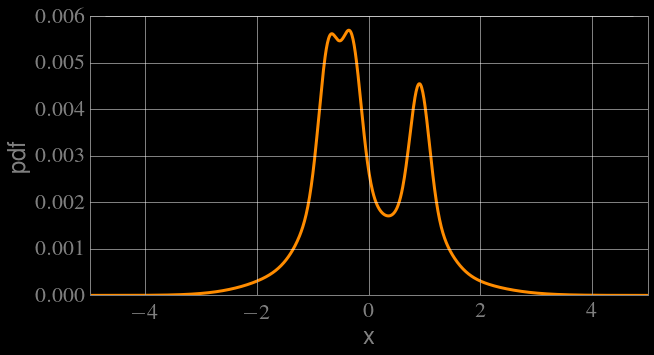

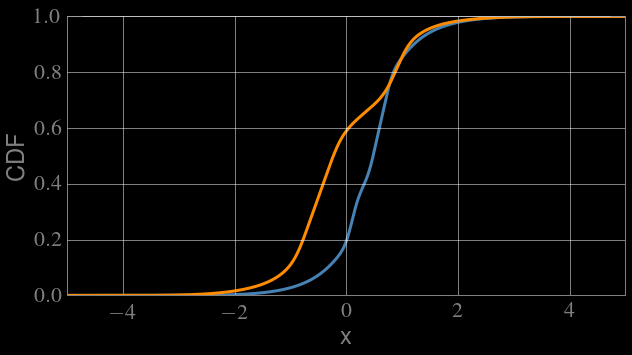

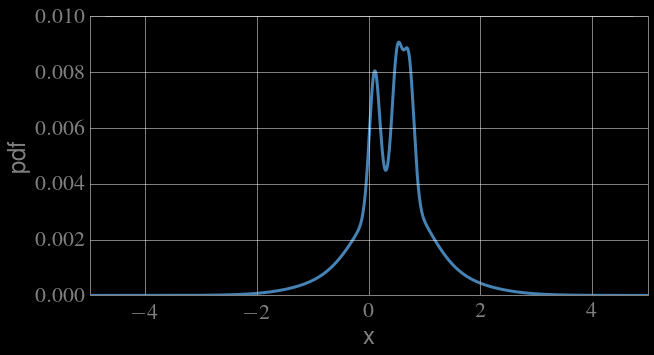

In [106]:
x=np.arange(-10,10,0.01)
gs = lambda x,m,s: np.exp((-(x-m)**2)/2.0/s/s)/s/np.sqrt(2.0*np.pi)



def mydist (x, mus, sigs):
    md=0.
    for mu in mus:
        for sig in sigs:
            md+=gs(x,mu,np.abs(sig))
            
    return  md


mus1=[0.106, 0.720, 0.514]
sigs1=[0.468,0.092,0.988]
dist1=mydist(x,mus1,sigs1)
dist1=dist1/sum(dist1)

fig = pl.figure(7,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x,dist1,color="SteelBlue", lw=3)
ax.set_xlabel("x",color='gray')


ax.set_ylabel("pdf",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/pdf_weird1.png', facecolor=fig.get_facecolor(), edgecolor='none')



mus2=[-0.306, -0.720, 0.914]
sigs2=[0.168,0.392,0.988]
dist2=mydist(x,mus2,sigs2)
dist2=dist2/sum(dist2)

fig = pl.figure(8,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x,dist2,color="DarkOrange", lw=3)
ax.set_xlabel("x",color='gray')


ax.set_ylabel("pdf",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/pdf_weird2.png', facecolor=fig.get_facecolor(), edgecolor='none')

fig = pl.figure(9,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x,cumsum(dist1),color="SteelBlue", lw=3)
ax.plot(x,cumsum(dist2),color="DarkOrange", lw=3)
ax.set_xlabel("x",color='gray')


ax.set_ylabel("CDF",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/CFD_cum.png', facecolor=fig.get_facecolor(), edgecolor='none')


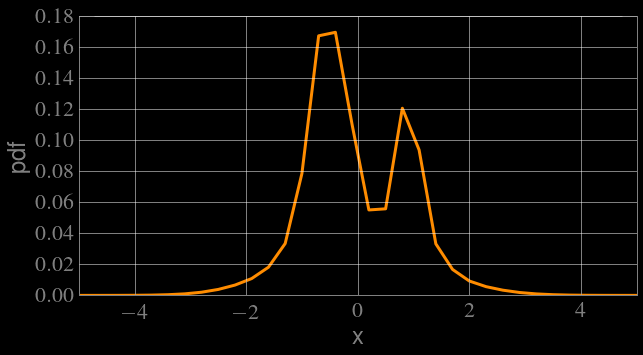

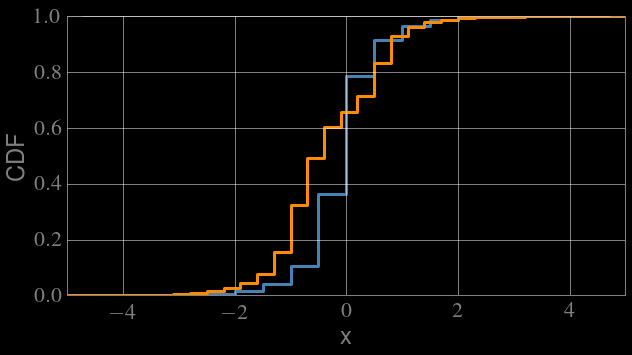

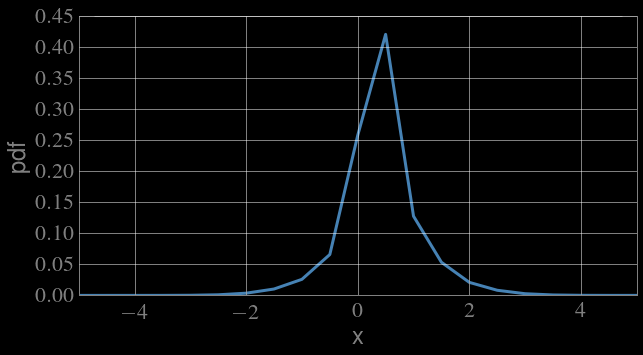

In [107]:
x1=np.arange(-10,10,0.5)

dist1=mydist(x1,mus1,sigs1)
dist1=dist1/sum(dist1)

fig = pl.figure(7,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x1,dist1,color="SteelBlue", lw=3)
ax.set_xlabel("x",color='gray')


ax.set_ylabel("pdf",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/pdf_weird1_undersampled.png', facecolor=fig.get_facecolor(), edgecolor='none')

x2=np.arange(-10,10,0.3)


dist2=mydist(x2,mus2,sigs2)
dist2=dist2/sum(dist2)

fig = pl.figure(8,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x2,dist2,color="DarkOrange", lw=3)
ax.set_xlabel("x",color='gray')


ax.set_ylabel("pdf",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/pdf_weird2_undersampled.png', facecolor=fig.get_facecolor(), edgecolor='none')

fig = pl.figure(9,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x1,cumsum(dist1),color="SteelBlue", lw=3, linestyle='steps')
ax.plot(x2,cumsum(dist2),color="DarkOrange", lw=3, linestyle='steps')
ax.set_xlabel("x",color='gray')


ax.set_ylabel("CDF",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/CFD_cum_undersampled.png', facecolor=fig.get_facecolor(), edgecolor='none')


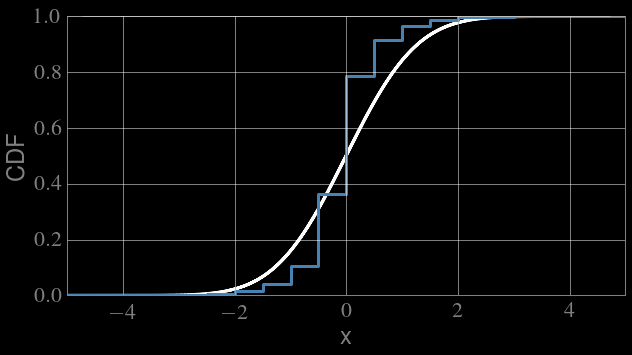

In [108]:
x1=np.arange(-10,10,0.5)

fig = pl.figure(10,figsize=(10,5))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, axisbg='black')
ax.tick_params(color='gray', labelcolor='gray')
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
ax.xaxis.grid(True, which="major", linestyle='-', color='white') 
ax.yaxis.grid(True, which="major", linestyle='-', color='white') 
        
ax.plot(x,cgs(x,0,1.0),color="white", lw=3, linestyle='steps')
ax.plot(x1,cumsum(dist1),color="SteelBlue", lw=3, linestyle='steps')
ax.set_xlabel("x",color='gray')


ax.set_ylabel("CDF",color='gray')
#ax.set_ylim(-0.05,1.05)
ax.set_xlim(-5,5) 

pl.savefig(os.getenv('PUI15PLOTS')+'/CFD_cum_model.png', facecolor=fig.get_facecolor(), edgecolor='none')
